# Receipt Data - Exploratory Data Analysis

This notebook provides a comprehensive analysis of the receipt dataset from Azerbaijani retail stores.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully!')

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('../data/ai_improved.csv')
print(f'Dataset loaded successfully!')
print(f'Shape: {df.shape[0]:,} rows × {df.shape[1]} columns')

Dataset loaded successfully!
Shape: 212 rows × 30 columns


## 2. Basic Data Overview

In [3]:
# Display first few rows
print('First 5 rows of the dataset:')
df.head()

First 5 rows of the dataset:


,filename,store_name,store_address,store_code,taxpayer_name,tax_id,receipt_number,cashier_name,date,time,...,advance_payment,credit_payment,queue_number,cash_register_model,cash_register_serial,fiscal_id,fiscal_registration,refund_amount,refund_date,refund_time
0,9FjTM9ngrpCu.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,16538,Hasanova Gulnar,15.01.2024,08:30:11,...,0.0,0.0,319.0,NCR RealPOS XR7 (7703) KLR M-POS 1.05.90,0000035727,9FİTMƏngrpCu,163236.0,0.17,15.02.2024,06:01
1,9FjTM9ngrpCu.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,16538,Hasanova Gulnar,15.01.2024,08:30:11,...,0.0,0.0,319.0,NCR RealPOS XR7 (7703) KLR M-POS 1.05.90,0000035727,9FİTMƏngrpCu,163236.0,0.17,15.02.2024,06:01
2,9FjTM9ngrpCu.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,16538,Hasanova Gulnar,15.01.2024,08:30:11,...,0.0,0.0,319.0,NCR RealPOS XR7 (7703) KLR M-POS 1.05.90,0000035727,9FİTMƏngrpCu,163236.0,0.17,15.02.2024,06:01
3,zbRTryY1MVkR.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,786717,Quliyeva Gulnar,09.06.2023,08:20:47,...,0.0,0.0,90.0,IBM POS 700,41ARR40,zbRTiyYIMVKR,21835.0,0.09,09.07.2023,12:03
4,zbRTryY1MVkR.jpeg,PROMART Məhdud Məsuliyyətli Cəmiyyəti,"AZ1007 BAKI ŞƏHƏRİ, NƏRİMANOV RAYONU, SÜLEYMAN...",1702278621-14001,PROMART Məhdud Məsuliyyətli Cəmiyyəti,1.702279e+09,786717,Quliyeva Gulnar,09.06.2023,08:20:47,...,0.0,0.0,90.0,IBM POS 700,41ARR40,zbRTiyYIMVKR,21835.0,0.09,09.07.2023,12:03


In [4]:
# Dataset information
print('Dataset Information:')
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   filename              212 non-null    object 
 1   store_name            209 non-null    object 
 2   store_address         209 non-null    object 
 3   store_code            209 non-null    object 
 4   taxpayer_name         209 non-null    object 
 5   tax_id                209 non-null    float64
 6   receipt_number        209 non-null    object 
 7   cashier_name          209 non-null    object 
 8   date                  209 non-null    object 
 9   time                  209 non-null    object 
 10  item_name             209 non-null    object 
 11  quantity              209 non-null    float64
 12  unit_price            209 non-null    float64
 13  line_total            209 non-null    float64
 14  subtotal              209 non-null    float64
 15  va

In [5]:
# Column names
print('\nColumn Names:')
for i, col in enumerate(df.columns, 1):
    print(f'{i}. {col}')


Column Names:
1. filename
2. store_name
3. store_address
4. store_code
5. taxpayer_name
6. tax_id
7. receipt_number
8. cashier_name
9. date
10. time
11. item_name
12. quantity
13. unit_price
14. line_total
15. subtotal
16. vat_18_percent
17. total_tax
18. cashless_payment
19. cash_payment
20. bonus_payment
21. advance_payment
22. credit_payment
23. queue_number
24. cash_register_model
25. cash_register_serial
26. fiscal_id
27. fiscal_registration
28. refund_amount
29. refund_date
30. refund_time


## 3. Data Quality Assessment

In [6]:
# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print('Missing Values Summary:')
print(missing_data[missing_data['Missing_Count'] > 0])

Missing Values Summary:
                                    Column  Missing_Count  Missing_Percentage
credit_payment              credit_payment              5                2.36
vat_18_percent              vat_18_percent              3                1.42
line_total                      line_total              3                1.42
refund_date                    refund_date              3                1.42
refund_amount                refund_amount              3                1.42
fiscal_registration    fiscal_registration              3                1.42
fiscal_id                        fiscal_id              3                1.42
cash_register_serial  cash_register_serial              3                1.42
cash_register_model    cash_register_model              3                1.42
queue_number                  queue_number              3                1.42
total_tax                        total_tax              3                1.42
store_name                      store_na

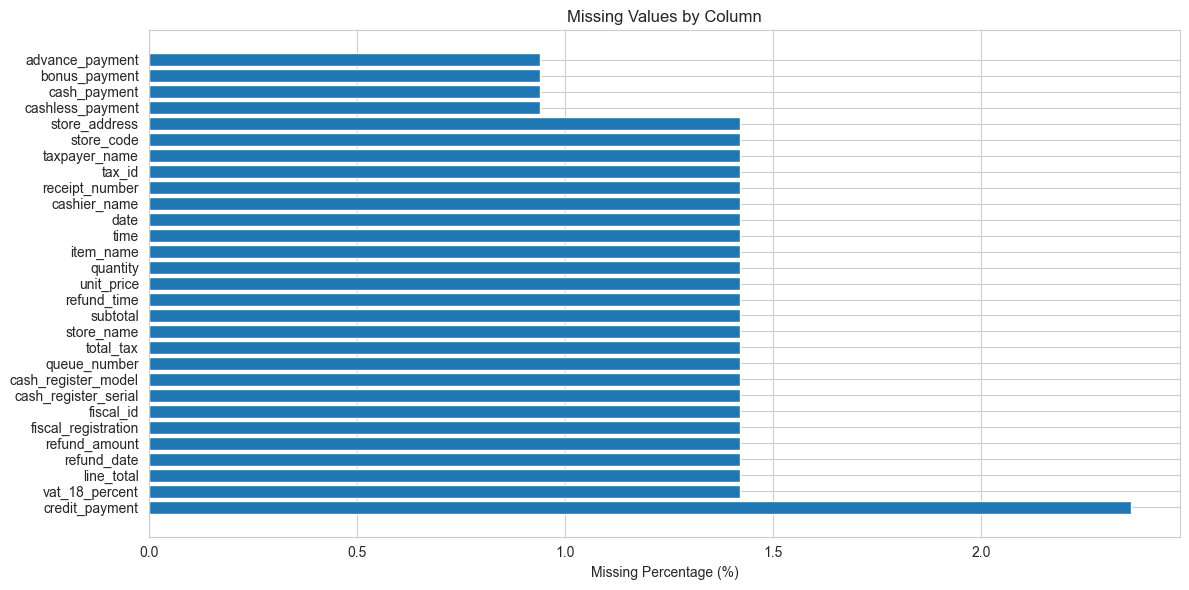

In [7]:
# Visualize missing data
missing_cols = missing_data[missing_data['Missing_Count'] > 0]
if len(missing_cols) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_cols['Column'], missing_cols['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print('No missing values found!')

In [8]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'\nNumber of duplicate rows: {duplicates:,}')
print(f'Percentage: {(duplicates/len(df)*100):.2f}%')


Number of duplicate rows: 3
Percentage: 1.42%


## 4. Numerical Features Analysis

In [9]:
# Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Descriptive Statistics for Numerical Features:')
df[numerical_cols].describe().T

Descriptive Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
tax_id,209.0,1.198114e+09,3.016676e+08,8.000057e+08,1.001994e+09,1.001994e+09,1.403051e+09,1.702279e+09
quantity,209.0,1.194756e+00,6.638304e-01,1.200000e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
unit_price,209.0,2.922153e+00,6.736416e+00,0.000000e+00,6.900000e-01,1.100000e+00,2.690000e+00,6.999000e+01
line_total,209.0,2.720526e+00,5.743820e+00,0.000000e+00,7.900000e-01,1.550000e+00,2.950000e+00,6.999000e+01
subtotal,209.0,1.086167e+01,9.146324e+00,8.500000e-01,5.780000e+00,7.870000e+00,1.241000e+01,6.999000e+01
vat_18_percent,209.0,1.443732e+00,1.228298e+00,1.300000e-01,6.900000e-01,1.090000e+00,1.770000e+00,1.068000e+01
total_tax,209.0,1.458660e+00,1.232064e+00,1.300000e-01,6.900000e-01,1.090000e+00,1.930000e+00,1.068000e+01
cashless_payment,210.0,1.064548e+01,9.397304e+00,0.000000e+00,5.330000e+00,7.870000e+00,1.241000e+01,6.999000e+01
cash_payment,210.0,1.523810e-02,2.208210e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+00
bonus_payment,210.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


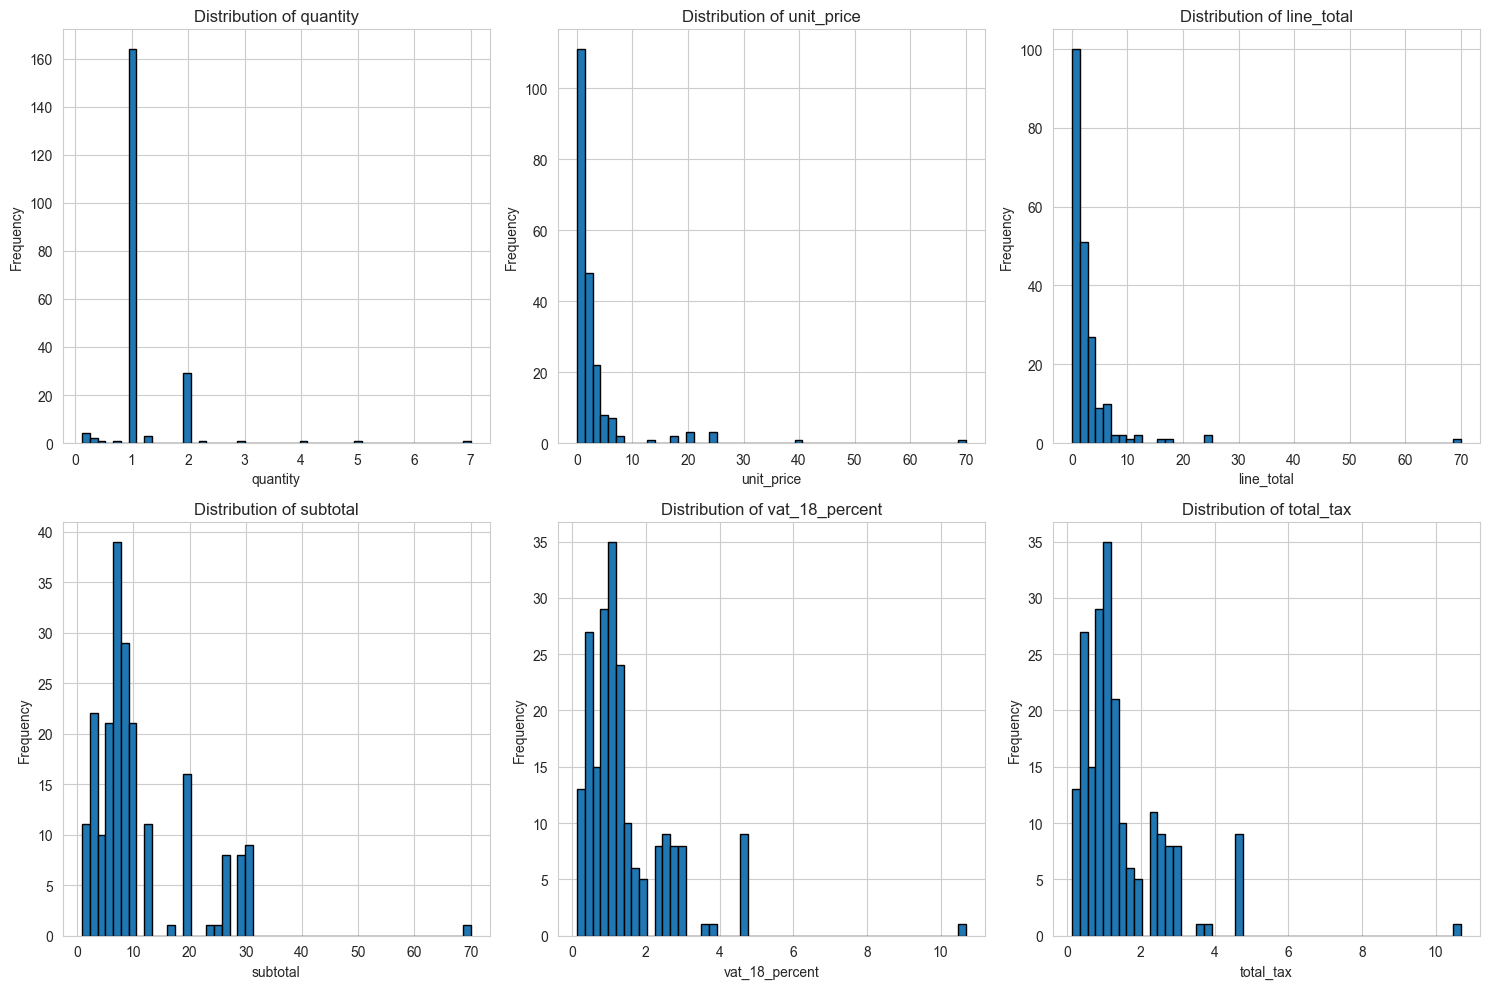

In [10]:
# Distribution of key numerical features
key_numeric_cols = ['quantity', 'unit_price', 'line_total', 'subtotal', 'vat_18_percent', 'total_tax']
available_cols = [col for col in key_numeric_cols if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(available_cols):
    if idx < len(axes):
        df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Store Analysis

In [11]:
# Unique stores
print('Store Analysis:')
print(f'Number of unique stores: {df["store_name"].nunique()}')
print(f'Number of unique receipts: {df["filename"].nunique()}')
print(f'\nTop 10 Stores by Transaction Count:')
df['store_name'].value_counts().head(10)

Store Analysis:
Number of unique stores: 19
Number of unique receipts: 62

Top 10 Stores by Transaction Count:


store_name
ARAZ SUPERMARKET                                  88
ARAZ SUPERMARKET MƏHDUD MƏSULİYYƏTLİ CƏMİYYƏTİ    30
PROMART Məhdud Məsuliyyətli Cəmiyyəti             23
AZƏRBAYCAN SUPERMARKET                            10
GRAND-MART                                         8
MARKET                                             8
KHATAI PARK                                        8
Sahil Trading MMC                                  6
Obyektin paylofl-s adlı mağaza                     5
DOKTA MƏHDUD MƏSULİYYƏTLİ CƏMİYYƏTİ                4
Name: count, dtype: int64

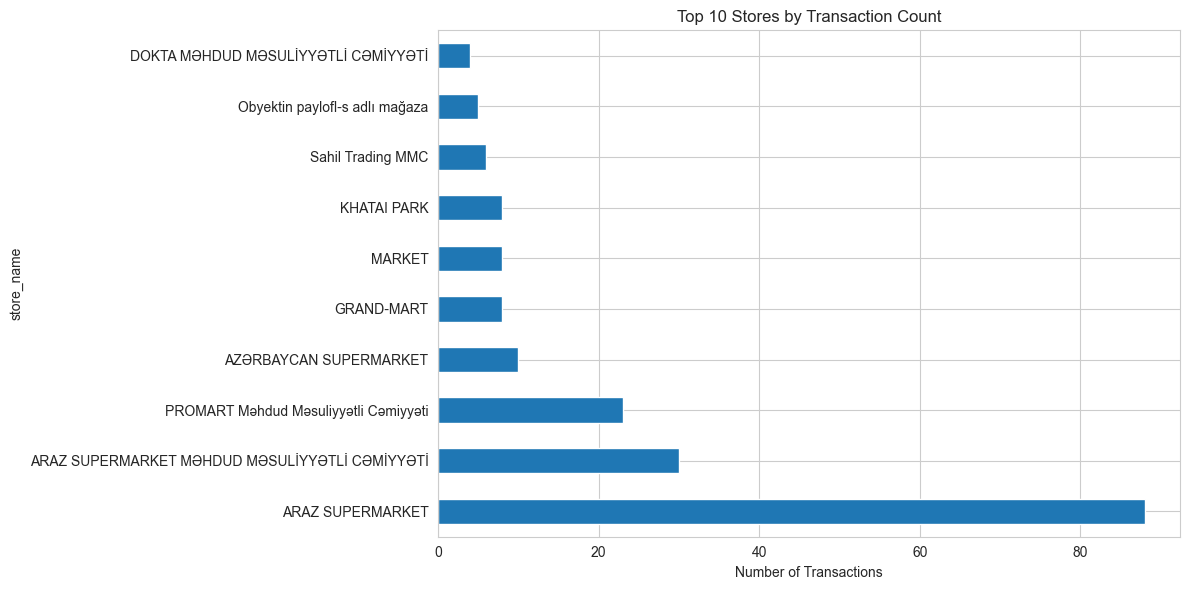

In [12]:
# Visualize top stores
top_stores = df['store_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_stores.plot(kind='barh')
plt.xlabel('Number of Transactions')
plt.title('Top 10 Stores by Transaction Count')
plt.tight_layout()
plt.show()


Top 10 Stores by Total Revenue:
store_name
ARAZ SUPERMARKET                                  1033.65
ARAZ SUPERMARKET MƏHDUD MƏSULİYYƏTLİ CƏMİYYƏTİ     301.46
KHATAI PARK                                        206.48
AZƏRBAYCAN SUPERMARKET                             175.84
PROMART Məhdud Məsuliyyətli Cəmiyyəti              137.51
YORKER                                              69.99
Obyektin paylofl-s adlı mağaza                      63.35
GRAND-MART                                          57.34
MARKET                                              39.44
COFFEE                                              38.00
Name: subtotal, dtype: float64


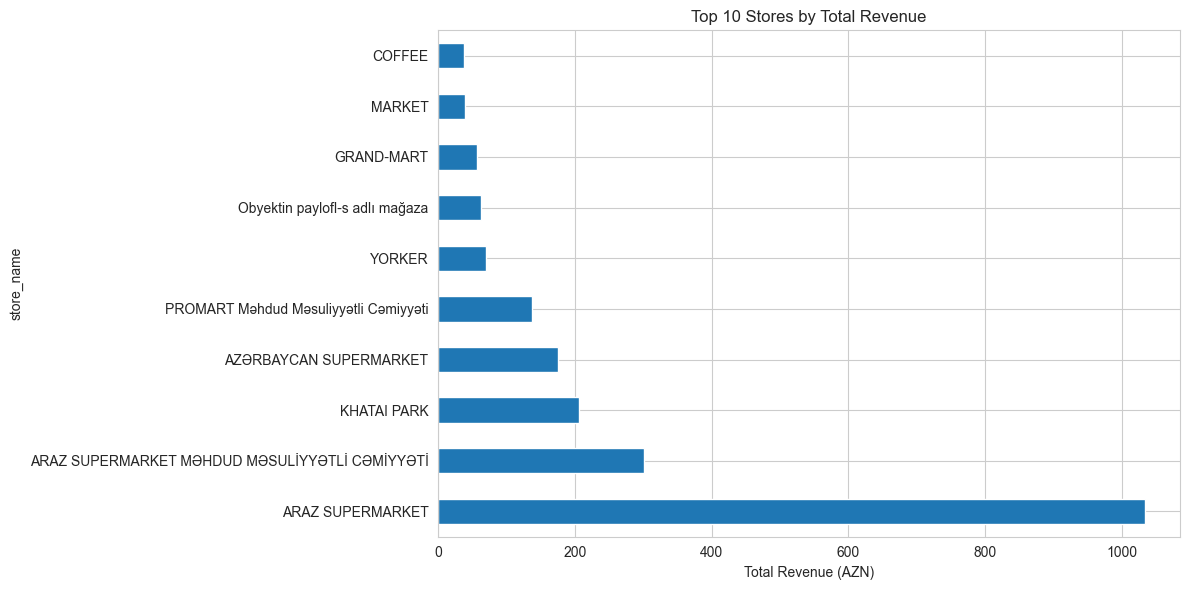

In [13]:
# Revenue by store
store_revenue = df.groupby('store_name')['subtotal'].sum().sort_values(ascending=False).head(10)
print('\nTop 10 Stores by Total Revenue:')
print(store_revenue)

plt.figure(figsize=(12, 6))
store_revenue.plot(kind='barh')
plt.xlabel('Total Revenue (AZN)')
plt.title('Top 10 Stores by Total Revenue')
plt.tight_layout()
plt.show()

## 6. Date and Time Analysis

In [14]:
# Convert date and time columns
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y', errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()

print('Date Range Analysis:')
print(f'Earliest transaction: {df["date"].min()}')
print(f'Latest transaction: {df["date"].max()}')
print(f'Total days covered: {(df["date"].max() - df["date"].min()).days} days')

Date Range Analysis:
Earliest transaction: 2023-02-25 00:00:00
Latest transaction: 2024-01-23 00:00:00
Total days covered: 332 days


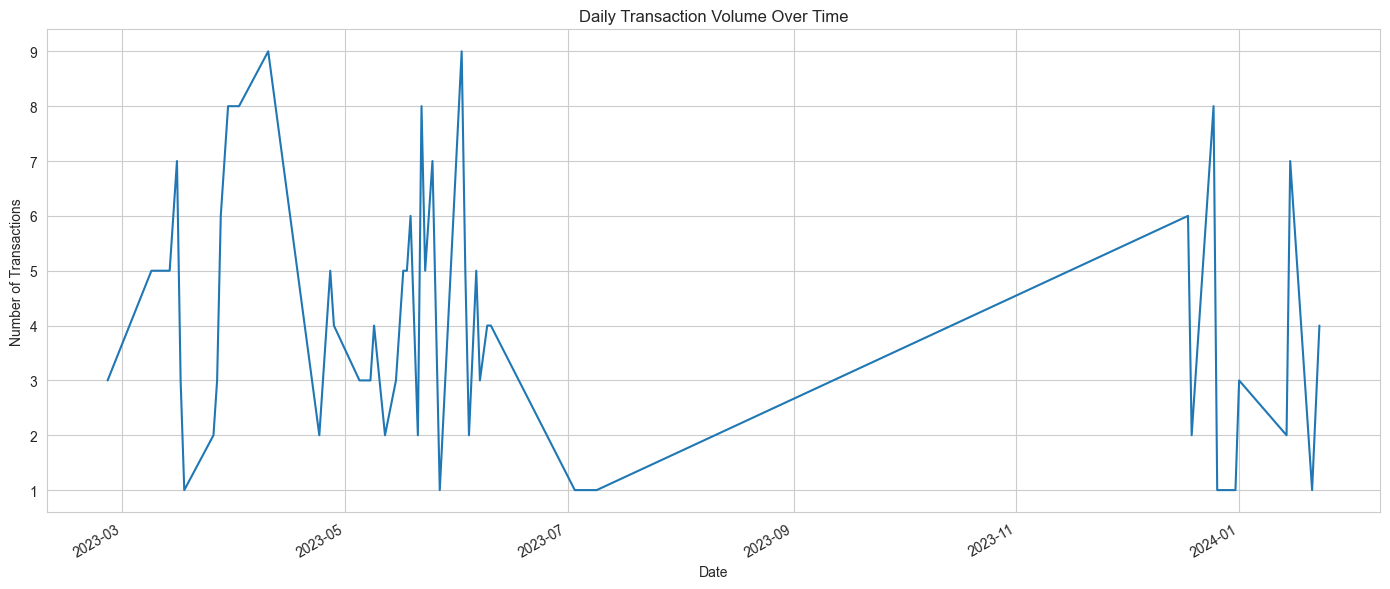

In [15]:
# Transactions over time
daily_transactions = df.groupby('date').size()
plt.figure(figsize=(14, 6))
daily_transactions.plot()
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Volume Over Time')
plt.tight_layout()
plt.show()

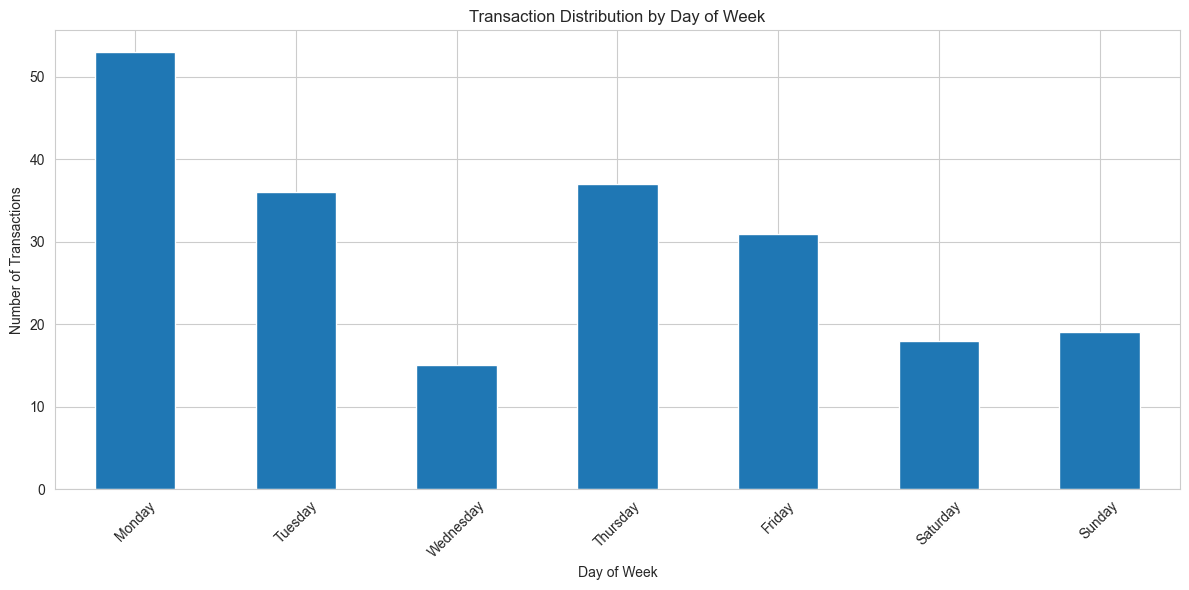

In [16]:
# Transactions by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions_by_day = df['day_name'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 6))
transactions_by_day.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.title('Transaction Distribution by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

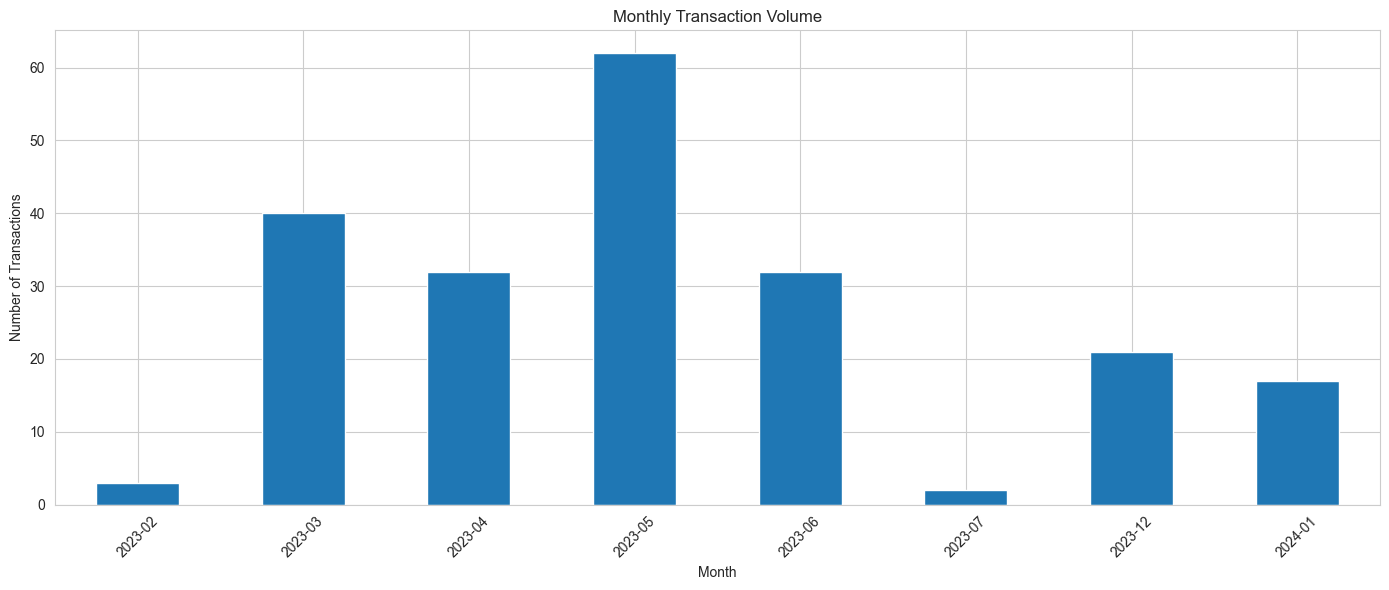

In [17]:
# Monthly transaction trends
monthly_transactions = df.groupby(df['date'].dt.to_period('M')).size()
plt.figure(figsize=(14, 6))
monthly_transactions.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Product Analysis

In [18]:
# Most popular products
print('Product Analysis:')
print(f'Total unique products: {df["item_name"].nunique()}')
print(f'\nTop 20 Most Purchased Products:')
top_products = df['item_name'].value_counts().head(20)
top_products

Product Analysis:
Total unique products: 152

Top 20 Most Purchased Products:


item_name
SIRAB QAZSIZ SU PET          9
Paket Araz 31*60 5KG         7
BAKILI QIZ DON.QEHVE         6
IVANOVKA DOVGA               5
Paket Araz                   5
LEZZET DUNYASI VINEQ         4
DARDANEL FASULYELI T         4
MAGAZA PAKETİ KİCİK          4
SU SİRAB QAZSIZ              3
SU SİRAB 0,51T QAZSIZ PL.    3
ROMASHKA XAMA                3
TENDİR COREYI EDED           2
MVT.GM ALCA YERLİ KG         2
BANAN KG                     2
TENDİR COREYİ                2
TENDİR COREYI                2
Paket Kiçik                  2
SLAVYANKA PLASMAS            2
EHRMANN SMETANOVNA           2
Paket Araz 31*60 5 K         2
Name: count, dtype: int64

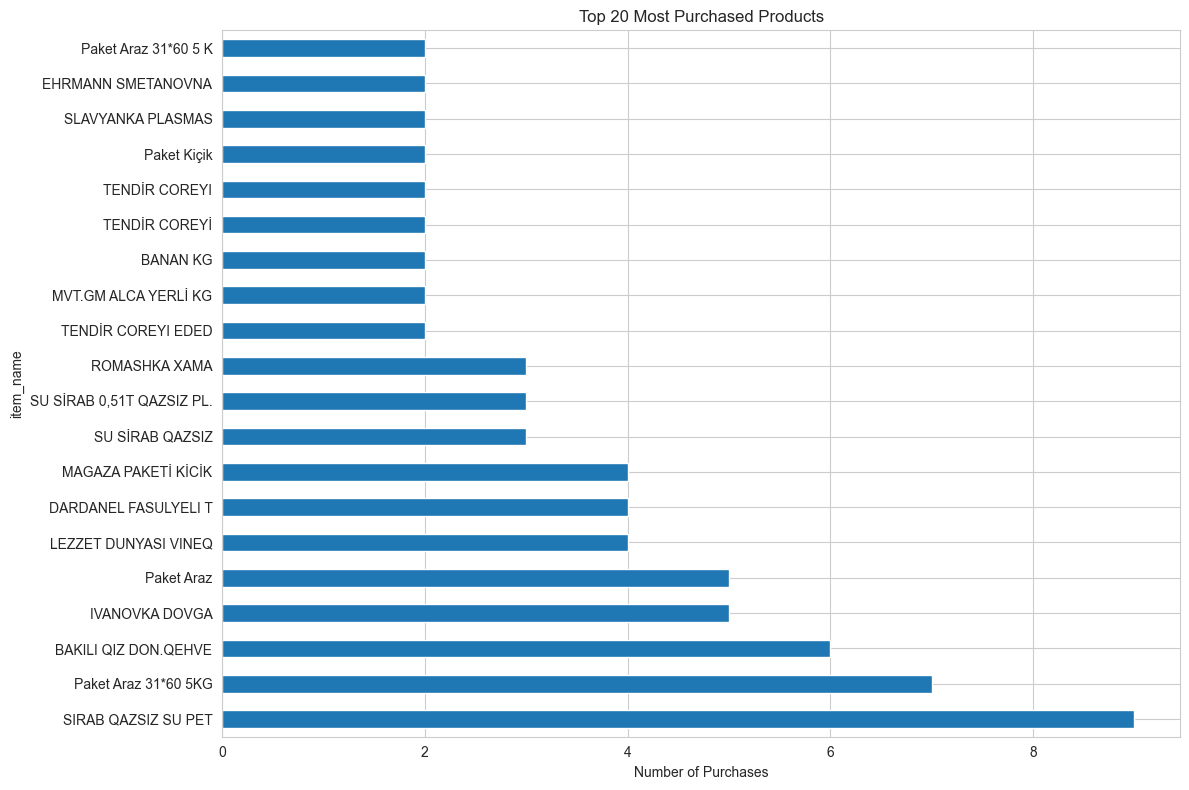

In [19]:
# Visualize top products
plt.figure(figsize=(12, 8))
top_products.plot(kind='barh')
plt.xlabel('Number of Purchases')
plt.title('Top 20 Most Purchased Products')
plt.tight_layout()
plt.show()


Top 20 Products by Revenue:
item_name
BlkActiveBackpack       69.99
DARDANEL FASULYELI T    33.72
TC-uni-black-L1         24.99
BAR TƏZƏ HAZEL TOP      24.00
Demaks D3 50 000 ED     17.00
BATON SNICKERS SUPER    12.53
IVANOVKA DOVGA          12.46
SIRAB QAZSIZ SU PET     12.45
LEZZET DUNYASI VINEQ    11.80
Dardanel Fasulyeli T    11.38
MVT.GM ALCA YERLİ KG    10.05
NAR MİNA SUPER KG        9.89
LEZZET DUNYASI VİNEQ     8.85
İYUBİMİY SİRE            8.78
SNICKERS                 8.49
ROMASHKA XAMA            8.28
BANAN KG                 7.72
Şaftalı Nektarı          7.14
Tatfe Tall               7.00
HN SACUSTU SOSİS         6.81
Name: line_total, dtype: float64


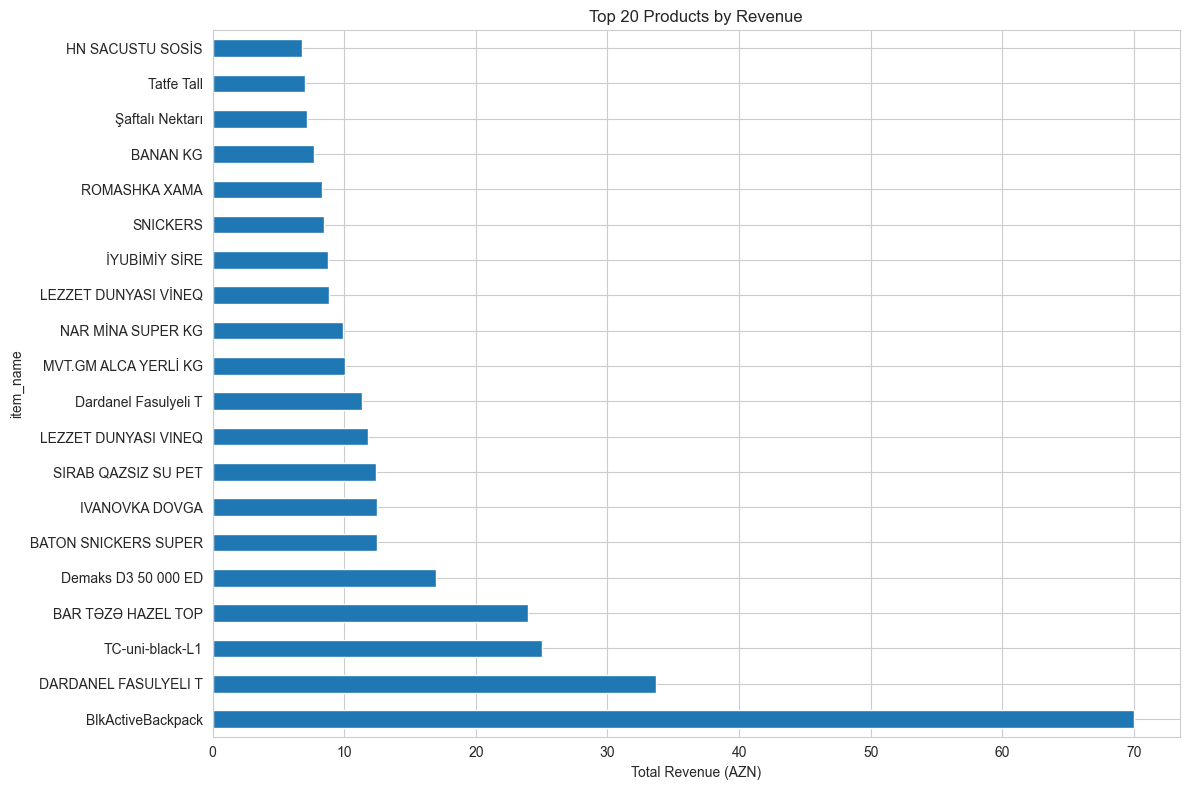

In [20]:
# Top products by revenue
product_revenue = df.groupby('item_name')['line_total'].sum().sort_values(ascending=False).head(20)
print('\nTop 20 Products by Revenue:')
print(product_revenue)

plt.figure(figsize=(12, 8))
product_revenue.plot(kind='barh')
plt.xlabel('Total Revenue (AZN)')
plt.title('Top 20 Products by Revenue')
plt.tight_layout()
plt.show()

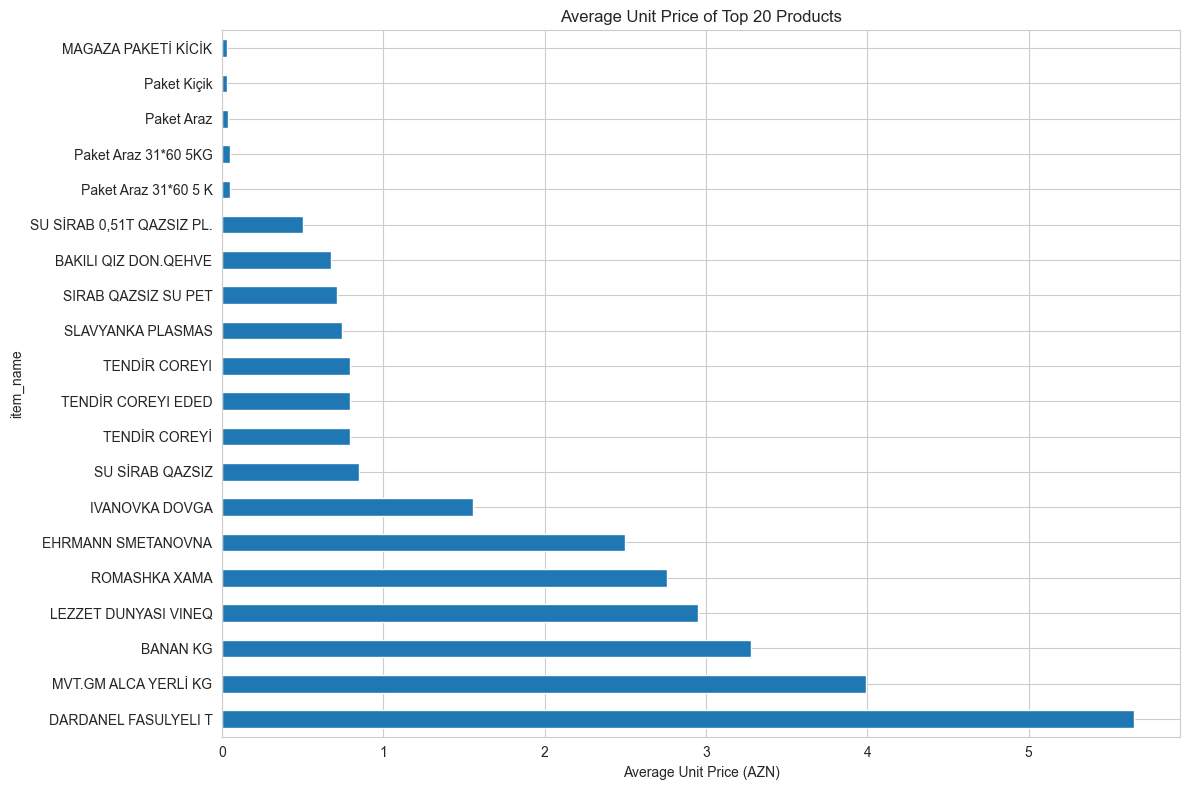

In [21]:
# Average price by product category (top 20 products)
top_20_items = df['item_name'].value_counts().head(20).index
avg_price_top = df[df['item_name'].isin(top_20_items)].groupby('item_name')['unit_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_price_top.plot(kind='barh')
plt.xlabel('Average Unit Price (AZN)')
plt.title('Average Unit Price of Top 20 Products')
plt.tight_layout()
plt.show()

## 8. Payment Analysis

Payment Methods Analysis:
       Payment_Type  Total_Amount
0  cashless_payment       2235.55
1      cash_payment          3.20
3   advance_payment          0.04


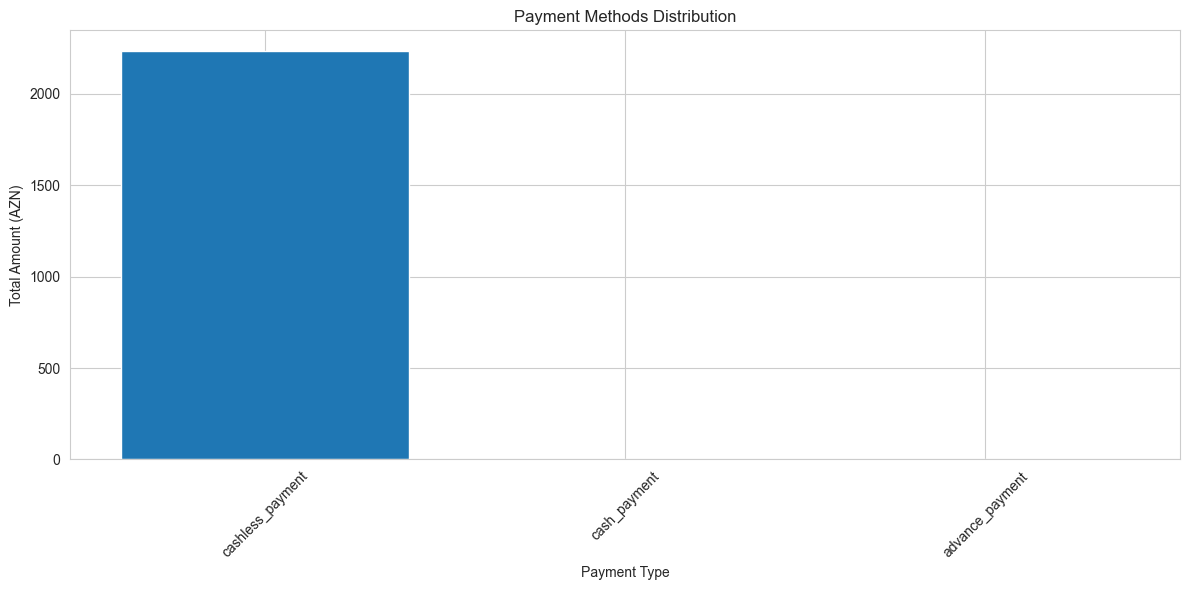

In [22]:
# Payment methods analysis
payment_cols = ['cashless_payment', 'cash_payment', 'bonus_payment', 'advance_payment', 'credit_payment']
payment_totals = {}

for col in payment_cols:
    if col in df.columns:
        payment_totals[col] = df[col].sum()

payment_df = pd.DataFrame(list(payment_totals.items()), columns=['Payment_Type', 'Total_Amount'])
payment_df = payment_df[payment_df['Total_Amount'] > 0]

print('Payment Methods Analysis:')
print(payment_df)

if len(payment_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.bar(payment_df['Payment_Type'], payment_df['Total_Amount'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel('Payment Type')
    plt.ylabel('Total Amount (AZN)')
    plt.title('Payment Methods Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 9. Revenue and Tax Analysis

In [23]:
# Overall revenue statistics
print('Revenue Statistics:')
print(f'Total Revenue (Subtotal): {df["subtotal"].sum():,.2f} AZN')
print(f'Total Tax Collected: {df["total_tax"].sum():,.2f} AZN')
print(f'Total VAT (18%): {df["vat_18_percent"].sum():,.2f} AZN')
print(f'Average Transaction Value: {df["subtotal"].mean():.2f} AZN')
print(f'Median Transaction Value: {df["subtotal"].median():.2f} AZN')

Revenue Statistics:
Total Revenue (Subtotal): 2,270.09 AZN
Total Tax Collected: 304.86 AZN
Total VAT (18%): 301.74 AZN
Average Transaction Value: 10.86 AZN
Median Transaction Value: 7.87 AZN


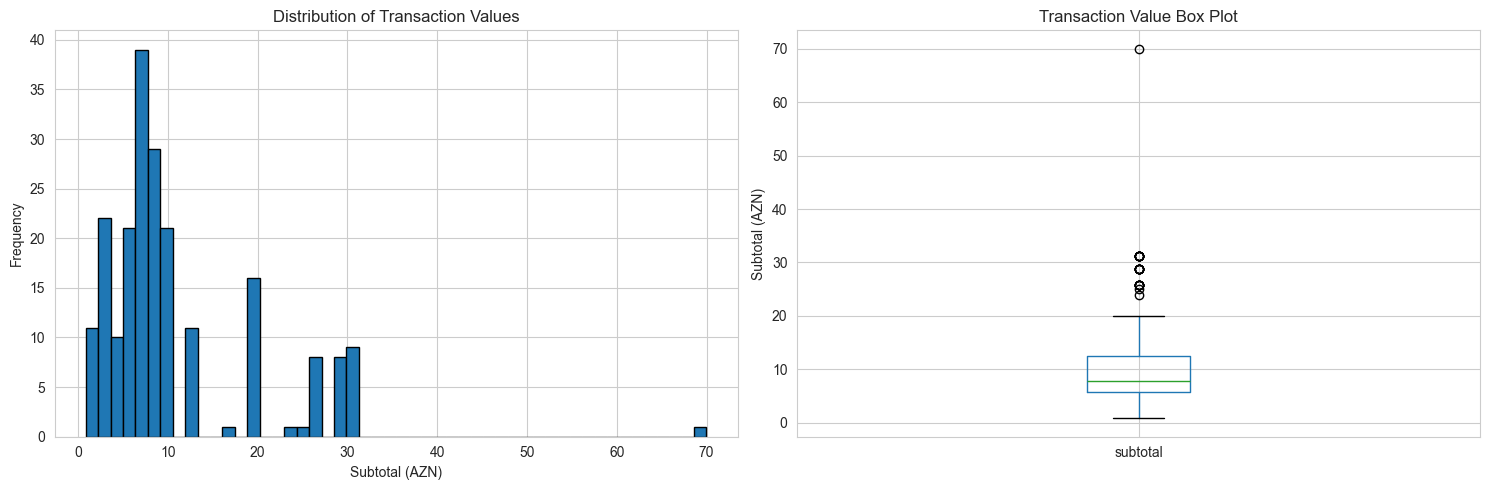

In [24]:
# Revenue distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
df['subtotal'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_xlabel('Subtotal (AZN)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Transaction Values')

# Box plot
df.boxplot(column='subtotal', ax=axes[1])
axes[1].set_ylabel('Subtotal (AZN)')
axes[1].set_title('Transaction Value Box Plot')

plt.tight_layout()
plt.show()

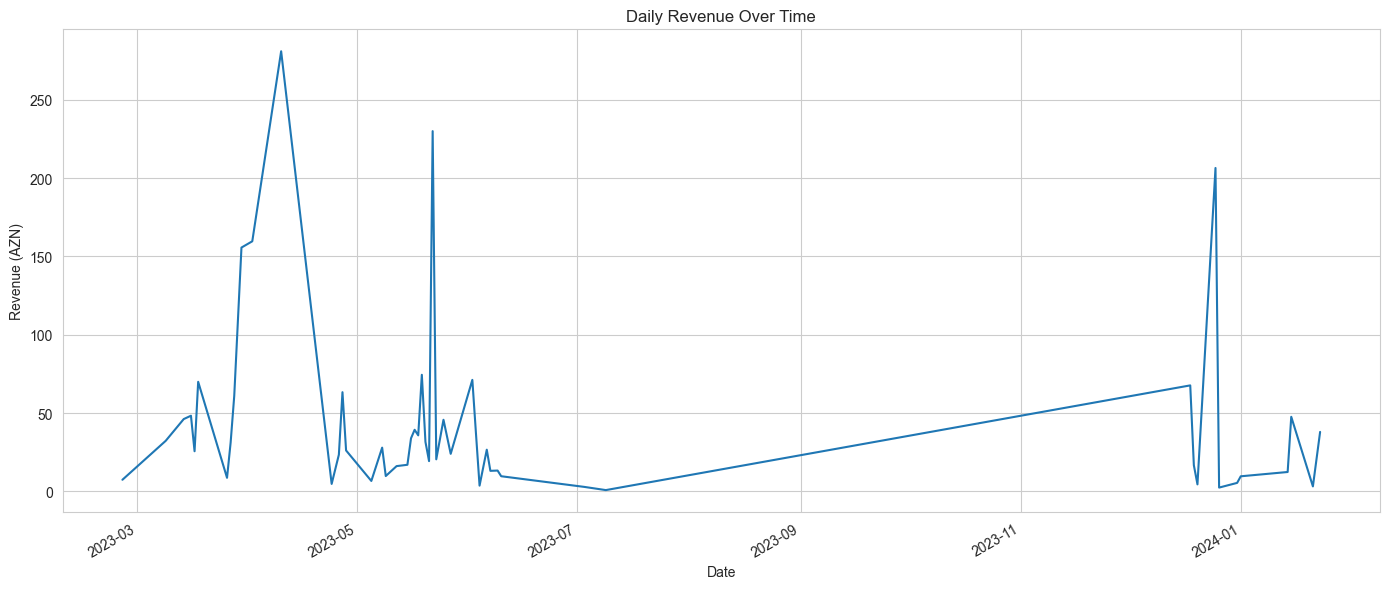

In [25]:
# Daily revenue trend
daily_revenue = df.groupby('date')['subtotal'].sum()
plt.figure(figsize=(14, 6))
daily_revenue.plot()
plt.xlabel('Date')
plt.ylabel('Revenue (AZN)')
plt.title('Daily Revenue Over Time')
plt.tight_layout()
plt.show()

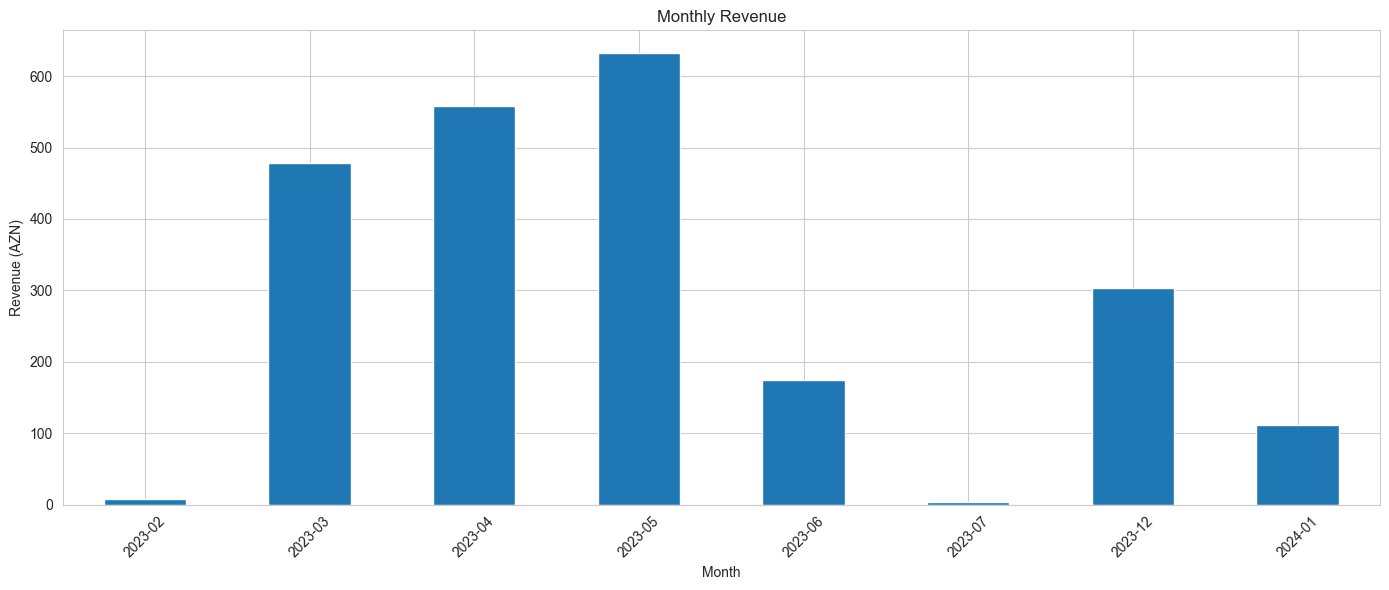

In [26]:
# Monthly revenue
monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['subtotal'].sum()
plt.figure(figsize=(14, 6))
monthly_revenue.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Revenue (AZN)')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Refund Analysis

In [27]:
# Refund statistics
refund_data = df[df['refund_amount'].notna() & (df['refund_amount'] > 0)]
print('Refund Analysis:')
print(f'Total refunded transactions: {len(refund_data):,}')
print(f'Refund rate: {(len(refund_data)/len(df)*100):.2f}%')
print(f'Total refund amount: {refund_data["refund_amount"].sum():,.2f} AZN')
print(f'Average refund amount: {refund_data["refund_amount"].mean():.2f} AZN')

Refund Analysis:
Total refunded transactions: 209
Refund rate: 98.58%
Total refund amount: 52.33 AZN
Average refund amount: 0.25 AZN


## 11. Cashier Analysis

Cashier Performance:
Total unique cashiers: 30

Top 10 Cashiers by Transaction Count:
cashier_name
Zohra Babayeva          39
Agos Bagirov            35
Ramazan Zeynalov        23
Eliyar Memmedov         15
Quliyeva Gulnar         10
RAHMANZADA C.           10
HÜSEYNOV                 8
Konul Bayramova          6
Rəsul Moisiyev Denis     6
GULNARE BAYRAMOVA        5
Name: count, dtype: int64


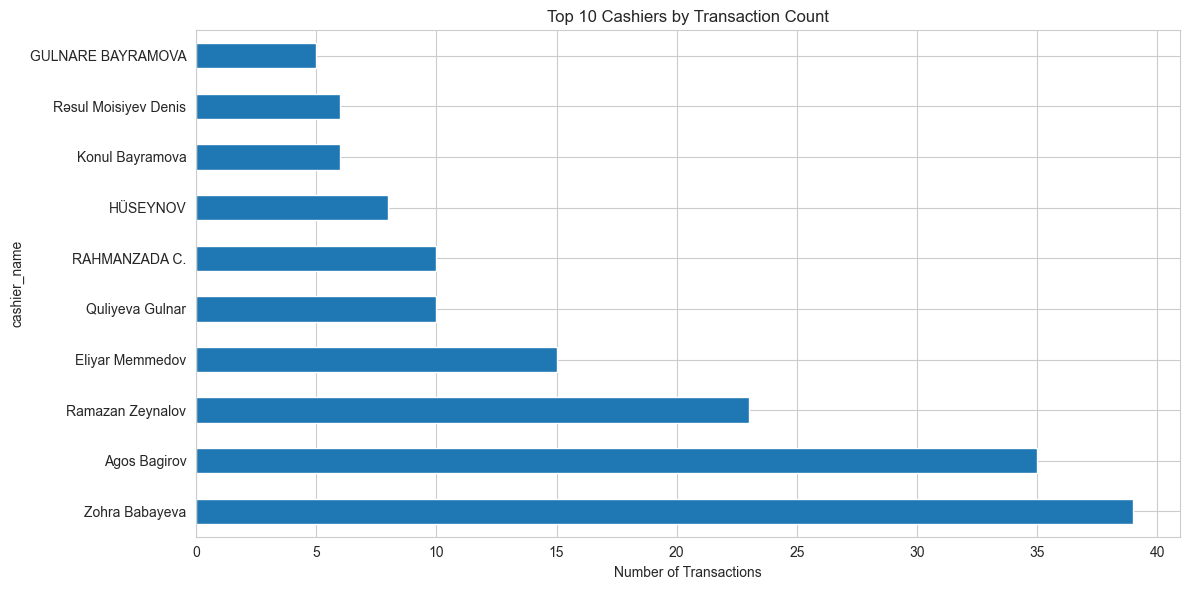

In [28]:
# Top cashiers by transaction count
print('Cashier Performance:')
print(f'Total unique cashiers: {df["cashier_name"].nunique()}')
top_cashiers = df['cashier_name'].value_counts().head(10)
print(f'\nTop 10 Cashiers by Transaction Count:')
print(top_cashiers)

plt.figure(figsize=(12, 6))
top_cashiers.plot(kind='barh')
plt.xlabel('Number of Transactions')
plt.title('Top 10 Cashiers by Transaction Count')
plt.tight_layout()
plt.show()

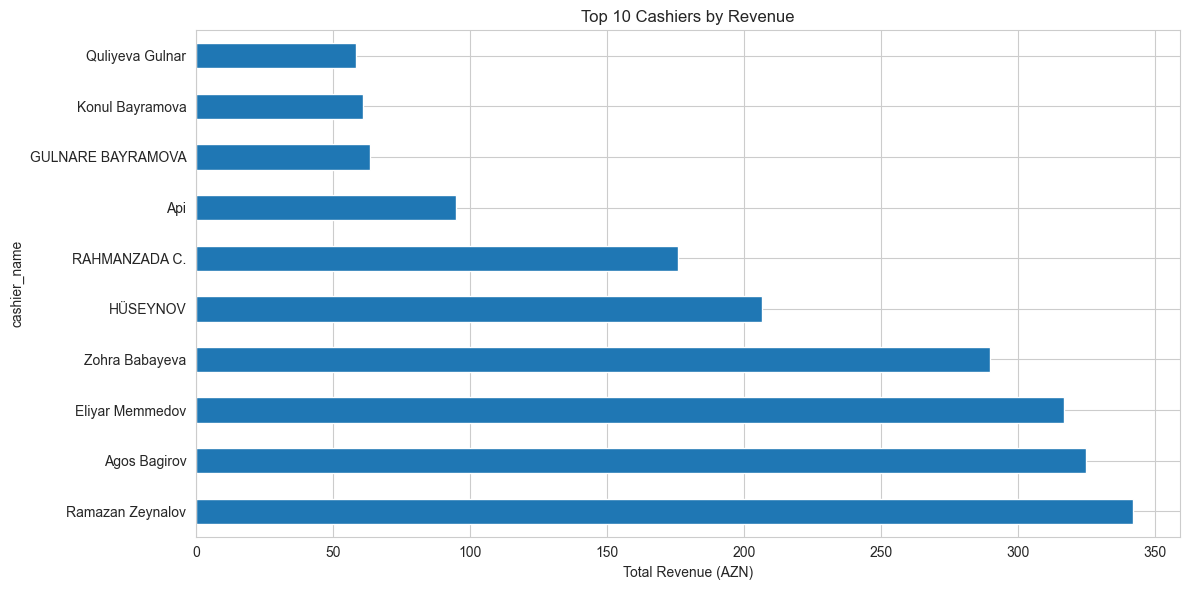

In [29]:
# Cashier revenue performance
cashier_revenue = df.groupby('cashier_name')['subtotal'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
cashier_revenue.plot(kind='barh')
plt.xlabel('Total Revenue (AZN)')
plt.title('Top 10 Cashiers by Revenue')
plt.tight_layout()
plt.show()

## 12. Correlation Analysis

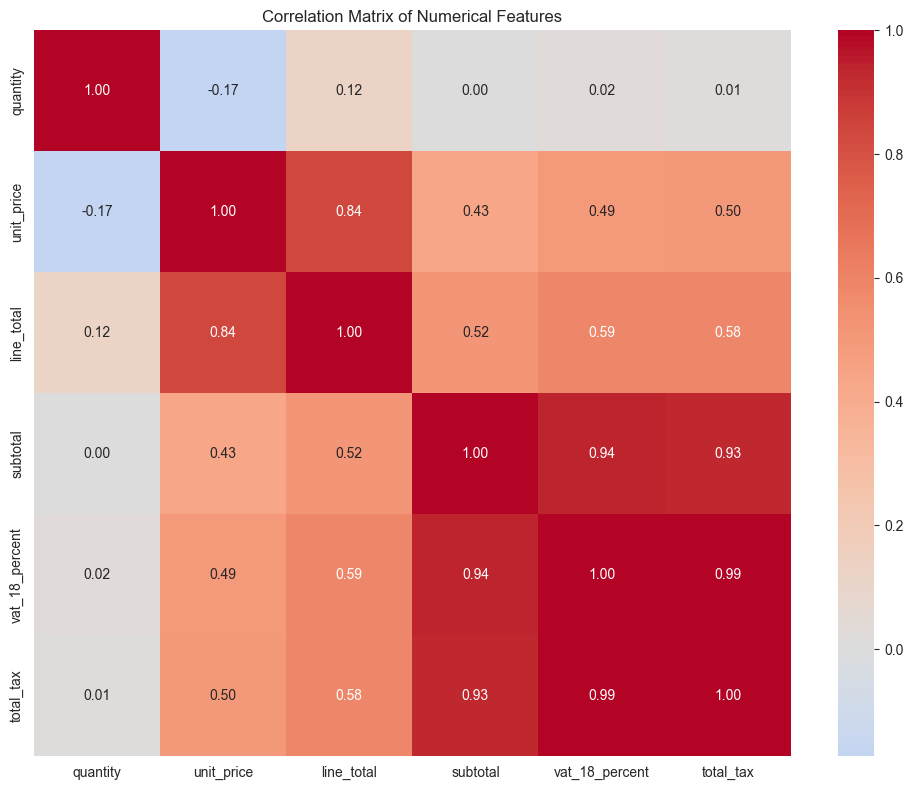

In [30]:
# Correlation matrix for key numerical features
corr_cols = ['quantity', 'unit_price', 'line_total', 'subtotal', 'vat_18_percent', 'total_tax']
available_corr_cols = [col for col in corr_cols if col in df.columns]

correlation_matrix = df[available_corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## 13. Summary Statistics

In [31]:
# Create comprehensive summary
summary = {
    'Total Transactions': len(df),
    'Total Receipts': df['filename'].nunique(),
    'Total Stores': df['store_name'].nunique(),
    'Total Products': df['item_name'].nunique(),
    'Total Cashiers': df['cashier_name'].nunique(),
    'Date Range': f"{df['date'].min()} to {df['date'].max()}",
    'Total Revenue (AZN)': f"{df['subtotal'].sum():,.2f}",
    'Total Tax Collected (AZN)': f"{df['total_tax'].sum():,.2f}",
    'Average Transaction Value (AZN)': f"{df['subtotal'].mean():.2f}",
    'Total Items Sold': f"{df['quantity'].sum():,.0f}",
}

summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
print('\n' + '='*60)
print('DATASET SUMMARY')
print('='*60)
print(summary_df.to_string(index=False))
print('='*60)


DATASET SUMMARY
                         Metric                                      Value
             Total Transactions                                        212
                 Total Receipts                                         62
                   Total Stores                                         19
                 Total Products                                        152
                 Total Cashiers                                         30
                     Date Range 2023-02-25 00:00:00 to 2024-01-23 00:00:00
            Total Revenue (AZN)                                   2,270.09
      Total Tax Collected (AZN)                                     304.86
Average Transaction Value (AZN)                                      10.86
               Total Items Sold                                        250


## 14. Key Insights and Conclusions

### Key Findings:

1. **Data Coverage**: The dataset contains receipts from multiple retail stores in Azerbaijan
2. **Store Performance**: Analysis reveals top performing stores by transaction volume and revenue
3. **Product Trends**: Certain products consistently appear across multiple transactions
4. **Temporal Patterns**: Transaction patterns vary by day of week and month
5. **Payment Methods**: Distribution of payment methods shows customer preferences
6. **Revenue Insights**: Clear revenue trends and patterns identified over time

### Recommendations:

- Focus on high-performing stores for best practices
- Stock optimization based on popular products
- Staffing adjustments based on transaction patterns
- Targeted promotions during low-traffic periods
- Further investigation into refund patterns to reduce losses